<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (합성신경망)

전체구조

* 지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있다. 이를 완전 연결(fully-connected)이라고 하며 완전히 연결된 게층을 affine 계층이라는 이름으로 구현했다.

* CNN도 지금까지 본 신경망과 같이 레고 블록처럼 계층을 조합하여 만들 수 있다. 합성곱 계층(convolutional layer)과 풀링 계층(pooling layer)이 새롭게 등장한다.

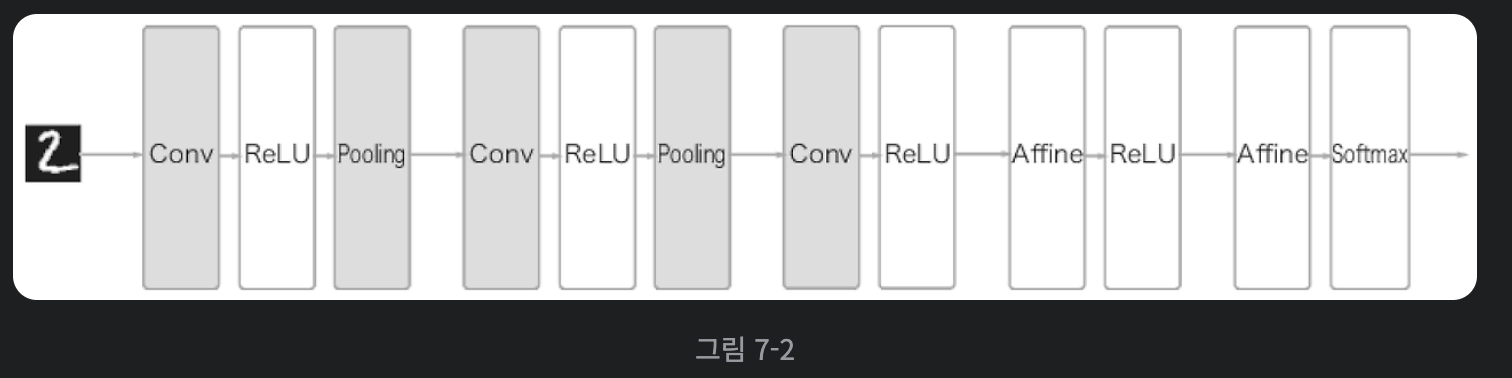

* CNN에서는 새로운 합성곱 계층(conv)과 풀링 계층(pooling)이 추가 되며 CNN 계층은 Conv-FeLU-(Pooling) 흐름으로 연결된다.

* 지금까지의 Affine-ReLU 연결이 Conv-FeLU-(Pooling) 흐름으로 변경되었다고 보면 된다.

* CNN에서 출력에 가까운 층에서는 지금까지의 Affine-ReLU 구성을 사용할 수 있다. 또 마지막 출력 계층에서는 affine-softmax 조합을 그대로 사용한다.

# 합성곱 계층

* cnn에서는 패딩, 스트라이드 등 cnn 고유의 용어가 등장한다.
* 또 각 계층 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다르다.

완전연결 계층의 문제점

* 지금까지 본 완전연결 신경망에서는 완전연결 계층을 사용했다.
* 완전연결 계층에서는 인접하는 계층의 뉴련이 모두 연결되고 출력 수는 임의로 정할 수 있다.

* 완전 연결 계층의 문제점은 데이터의 형상이 무시 된다는 것이다.

* 입력 데이터가 이미지인 경우를 예로 들면, 이미지는 세로, 가로, 채널(색상)로 구성된 3차원 데이터이다. 완전 연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화 해 줘야 한다.

* 이미지는 이 3차원 형상에 공간적 정보가 담겨 있는데, 완전 연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런으로 취급하여 형상에 담긴 정보를 살릴 수 없다.

* 반면에, 합성곱 계층은 형상을 유지한다. 이미지도 3차원 데이터로 입력 받으며 다음 계층에도 3차원 데이터로 전달한다.

* CNN에서는 합성곱 계층의 입출력 데이터를 특징맵(feature map)이라고 한다. 입력 데이터를 입력 feature map, 출력 데이터를 출력 feature map이라고 한다.



합성곱 연산

* 합성곱 계층에서는 합성곱 연산을 처리한다. 합성곱 연산은 이미지 처리에서 말하는 필터 연산에 해당한다.

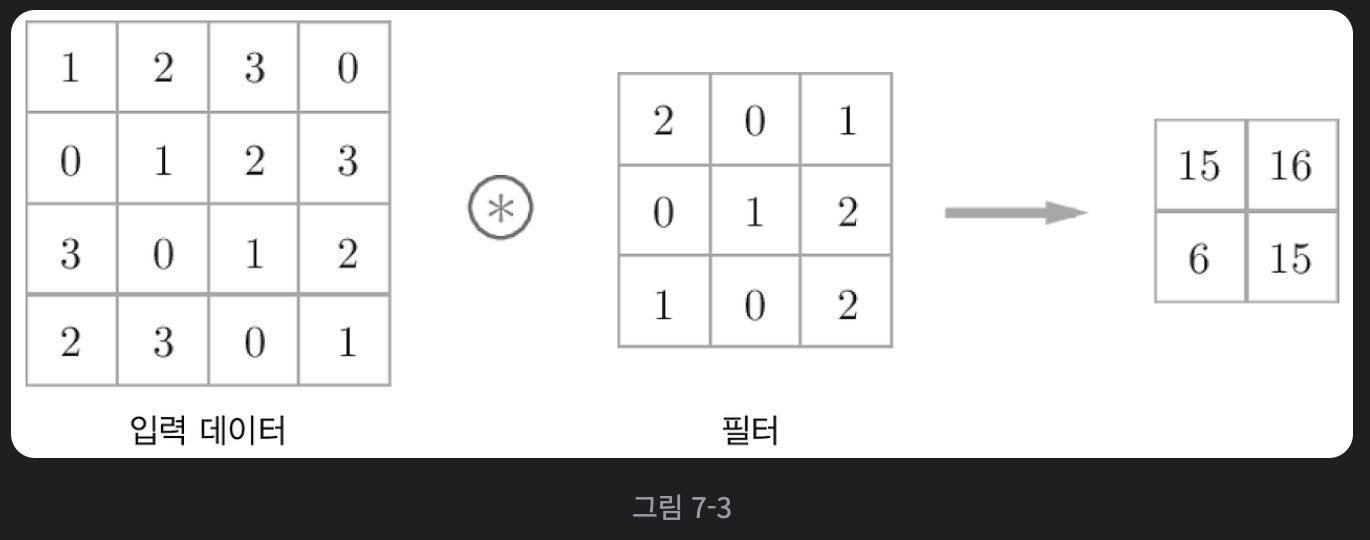

* 그림과 같이 합성곱 연산은 입력 데이터에 필터를 적용한다.
* 이 예에서 입력 데이터는 세로*가로 방향의 형상을 가지고 필터 또한 마찬가지다.
* 입력은 (4,4), 필터는 (3,3), 출력은 (2,2)가 된다. 필터를 커널이라고도 한다.

* 합성곱 연산의 필터는 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용한다.
* 여기에서 말하는 윈도우는 그림의 3x3 부분을 가르킨다. 계산과정을 거치고 그 결과를 출력의 해당 장소에 저장한다. (단일 곱셉 - 누산이라고 한다.)

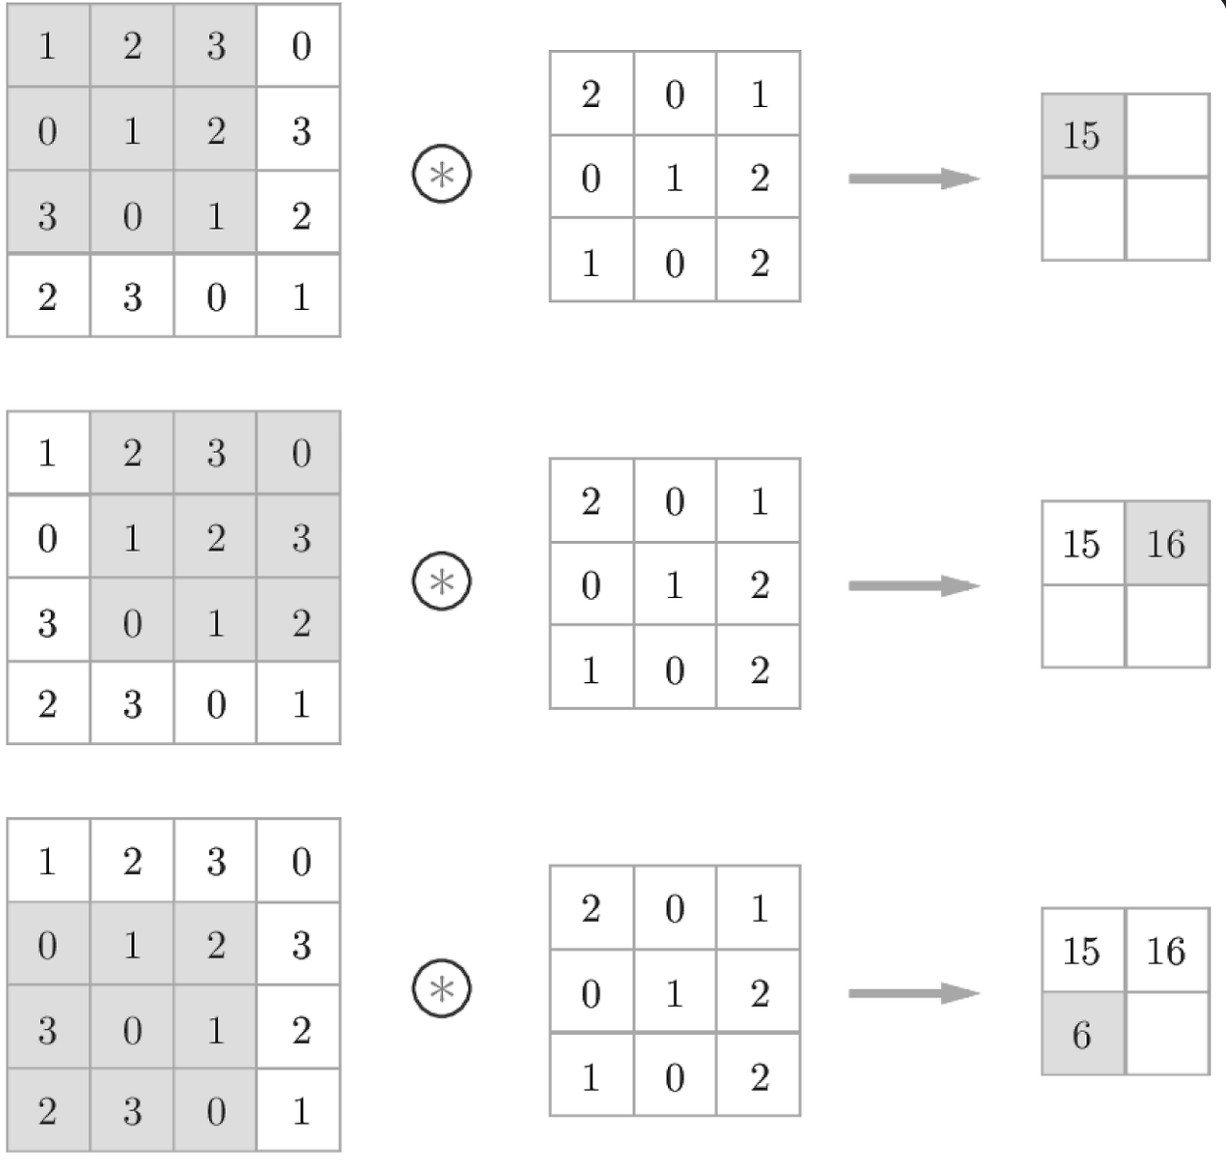

* 이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성된다.

* CNN에서는 필터의 매개변수가 그동안의 가중치에 해당한다.

* 또, CNN에서도 편향이 존재한다.

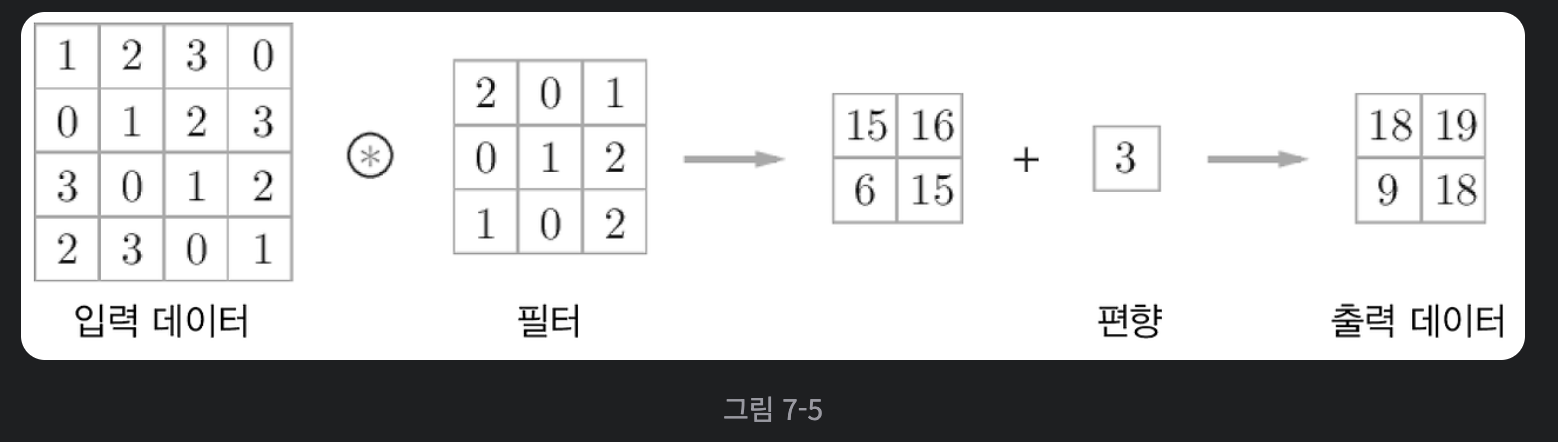

* 편향까지 포함하면 그림 7-5와 같은 흐름이 된다.

* 편향은 필터를 적용한 후의 데이터에 더해지며 편향은 항상 하나만 존재한다. 이 하나의 값을 필터를 적용한 모든 원소에 더하는 것이다.

패딩

* 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값으로 채우기도 한다. 이를 패딩(padding)이라고 하며 합성곱 연산에서 자주 이용하는 기법이다.

* 합성곱 연산의 패딩 처리 : 입력 데이터 주위에 0을 채운다.(패딩은 점선으로 표시했으며 그 안의 값 '0'은 생략했다.)

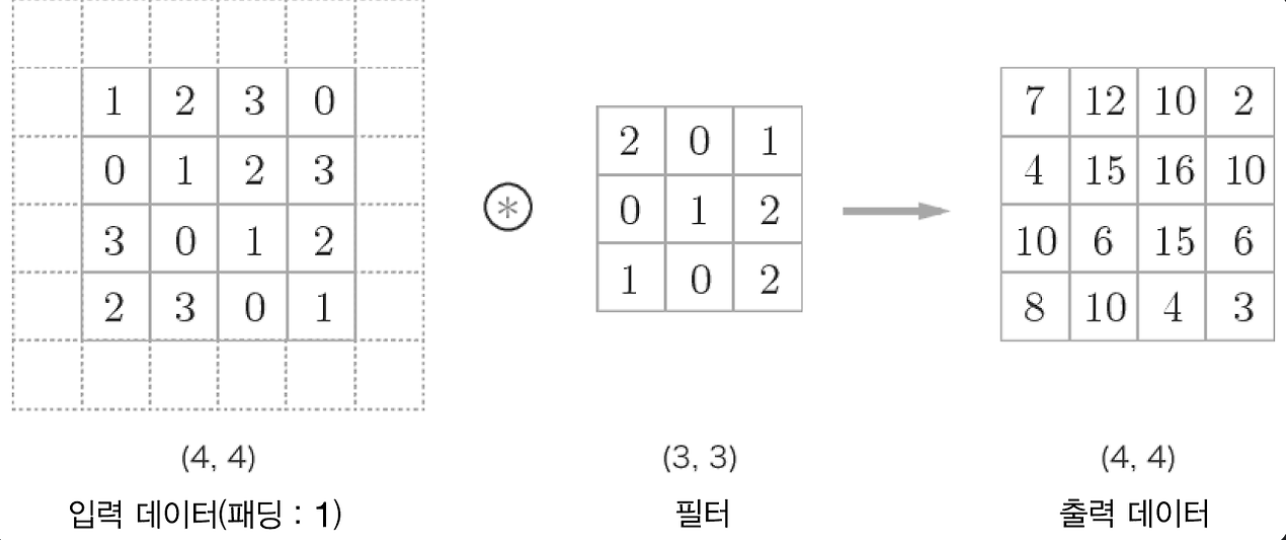

* 위 예시에서는 패딩을 1로 설정했지만 2나 3등 원하는 정수로 설정할 수 있다.

* 패딩은 주로 출력 크기를 조정할 목적으로 사용된다.
* 예를 들어 (4,4) 입력 데이터에 (3,3) 필터를 적용하면 출력은 (2,2)가 되어 입력보다 2만큼 작아진다.
* 합성곱 연산을 몇번이나 되풀이 하는 심층 신경망에서는 입력 데이터의 크기가 작아지는 문제가 있다.
* 때문에 어느 시점에서는 출력 크기가 1이 되어 더이상 합성곱 연산을 적용할 수 없게 된다.
* 앞의 예에서 패딩의 폭을 1로 설정하니 (4,4) 입력에 대한 출력이 같은 (4,4)로 유지되게 된다.

스트라이드

* 필터를 적용하는 위치의 간격을 스트라이드(strid)라고 한다.

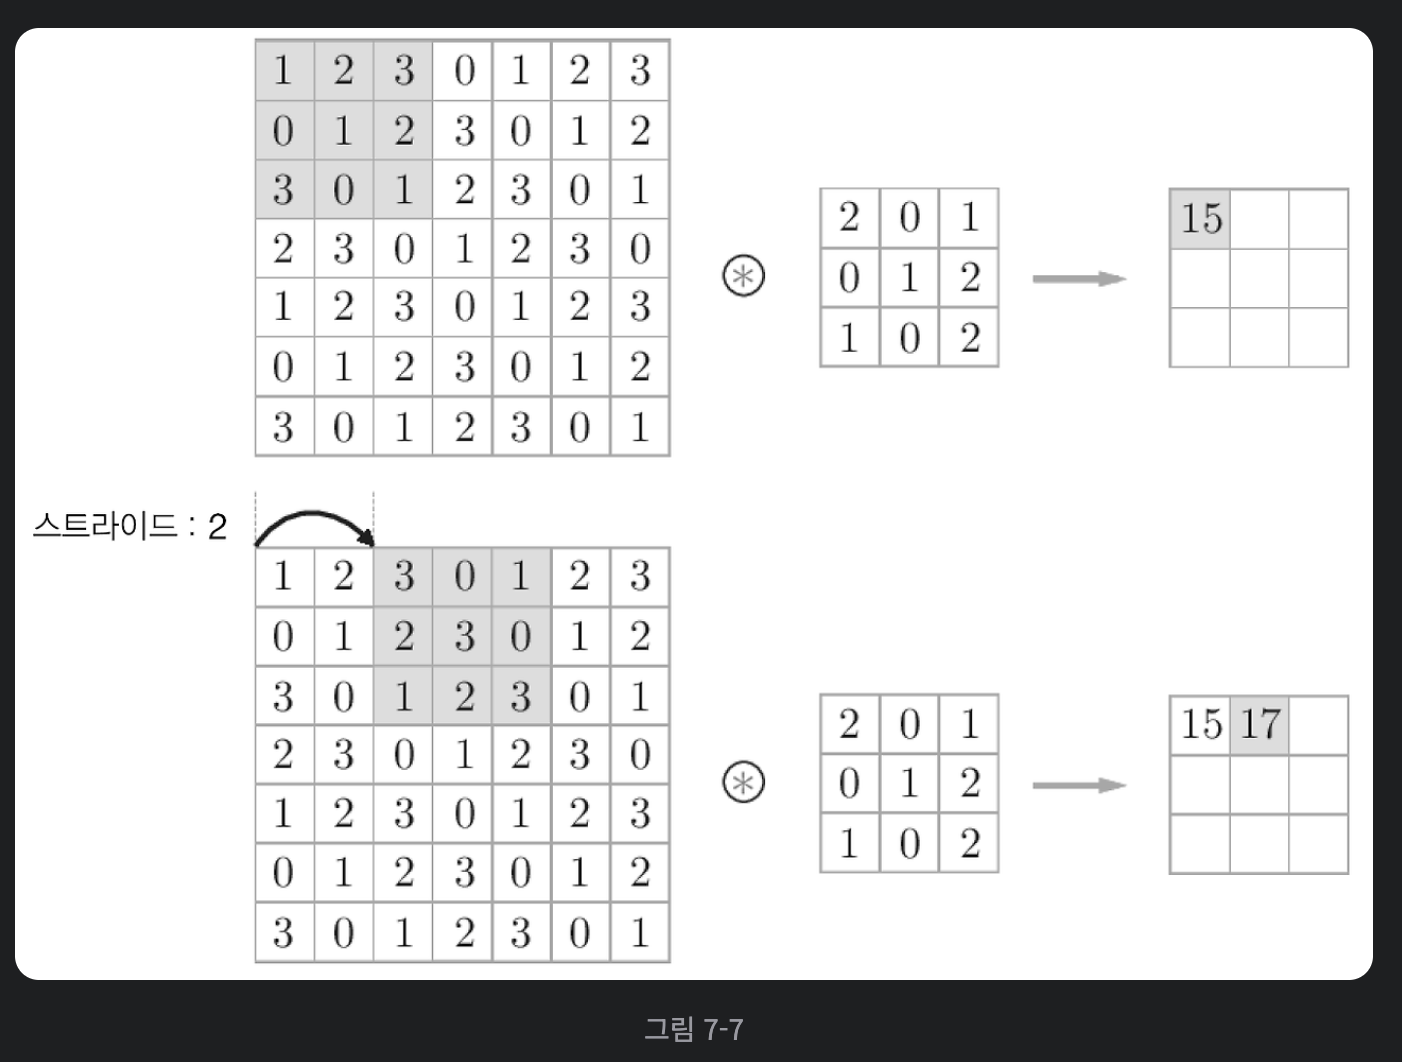

* 스트라이드를 2로 하면 필터를 적용하는 윈도우가 두 칸씩 이동하게 된다.

* 스트라이드를 키우면 출력 크기는 작아지며 패딩을 크게 하면 출력 크기가 커진다. 이러한 관계를 수식화 하면 다음과 같다.
* 입력 크기를 (H,W), 필터 크기를 (FH, FW), 출력 크기를 (OH, OW), 패딩을 p, 스트라이드를 S라 한다.

* 주의할점은 OH, OW는 정수로 떨어져야한다.

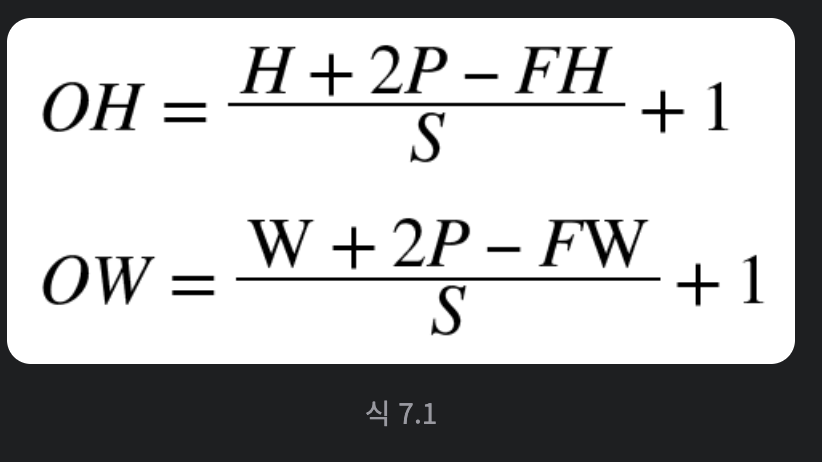

3차원 데이터의 합성곱 연산

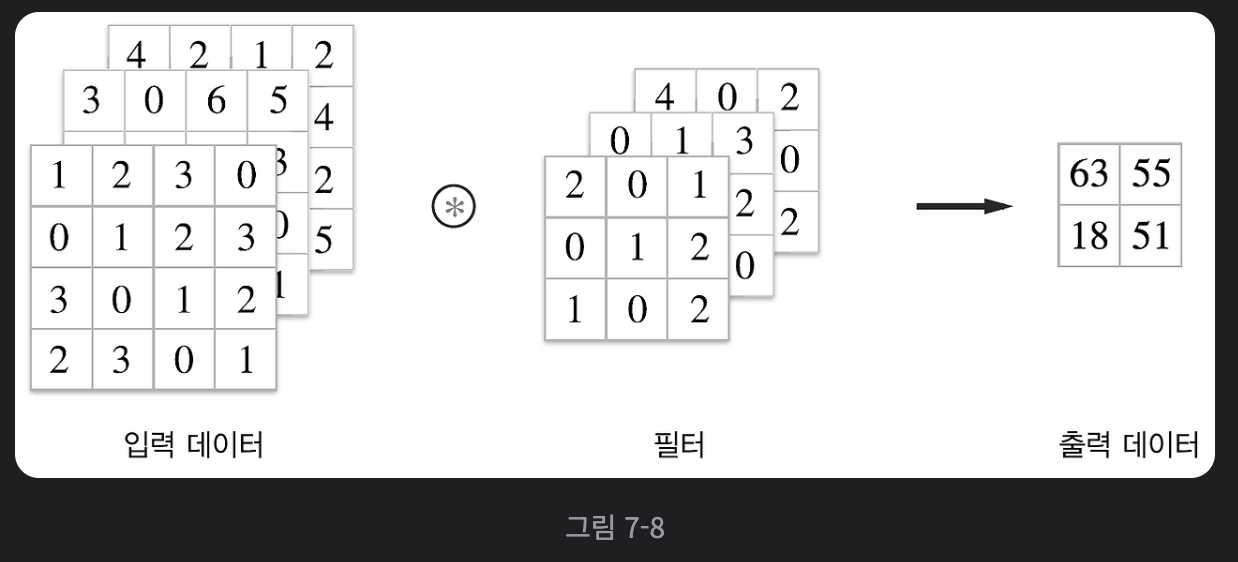



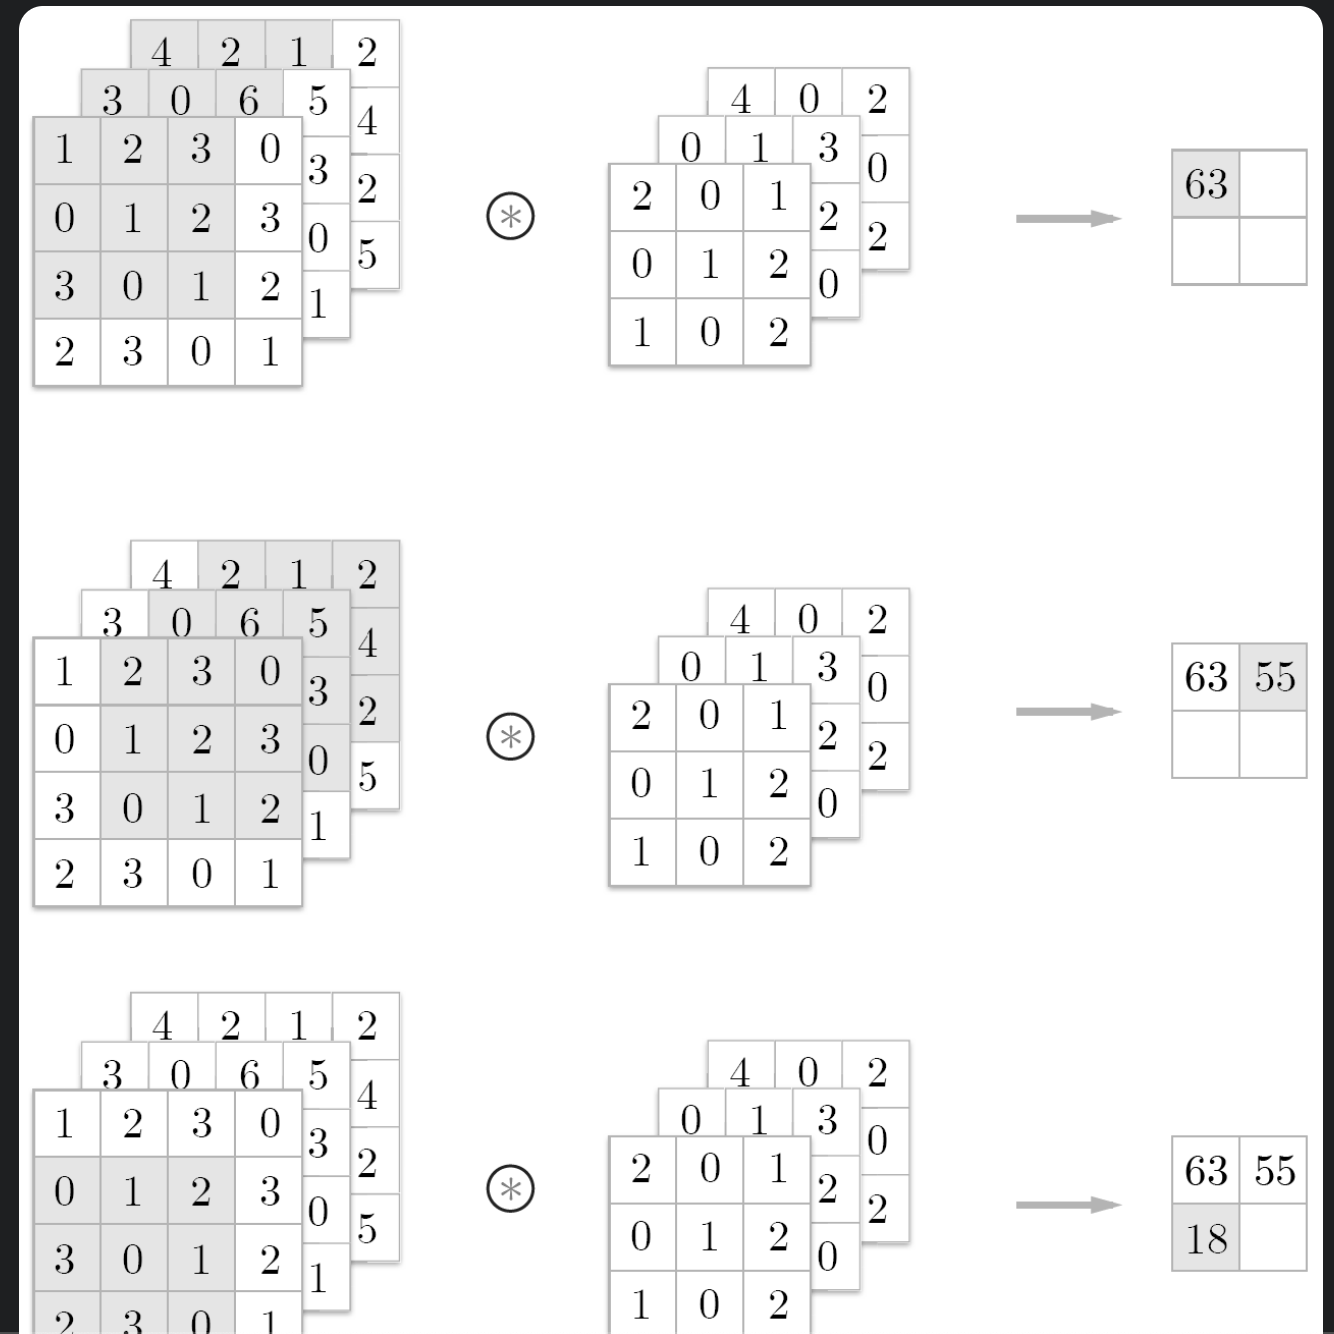

* 그림은 계산 순서를 나타낸 그림이다.

* 2차원일 때와 비교하면 길이 방향(채널 방향)으로 feature map이 늘어났다. 채널 쪽으로 feature map이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고 그 결과를 더해서 하나의 출력을 얻게 된다.

* 필터자체의 크기는 원하는 값으로 설정할 수 있다.

* 3차원 합성곱 연산에서 주의해야 할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것이다.

* (3,3) 이지만 (2,2), (5,5)도 가능하다는 의미이다. 그러나 필터의 채널 수는 입력 데이터의 채널 수와 같도록 설정해야한다.

블록으로 생각하기

* 3차원 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉽다.
* 3차원 데이터를 다차원 배열로 나타낼 때는 (채널, 높이, 너비) 순으로 쓰며 필터도 같은 순서로 쓴다.

* 예를 들어 채널 C, 높이 H, 너비 W인 데이터의 형상은 (C, H, W)로 쓴다.
* 필터도 같은 순서로 쓴다. 예를 들어 채널 수 C, 필터 높이 FH, 필터 너비 FW의 경우 (C, FH, FW)로 쓴다.

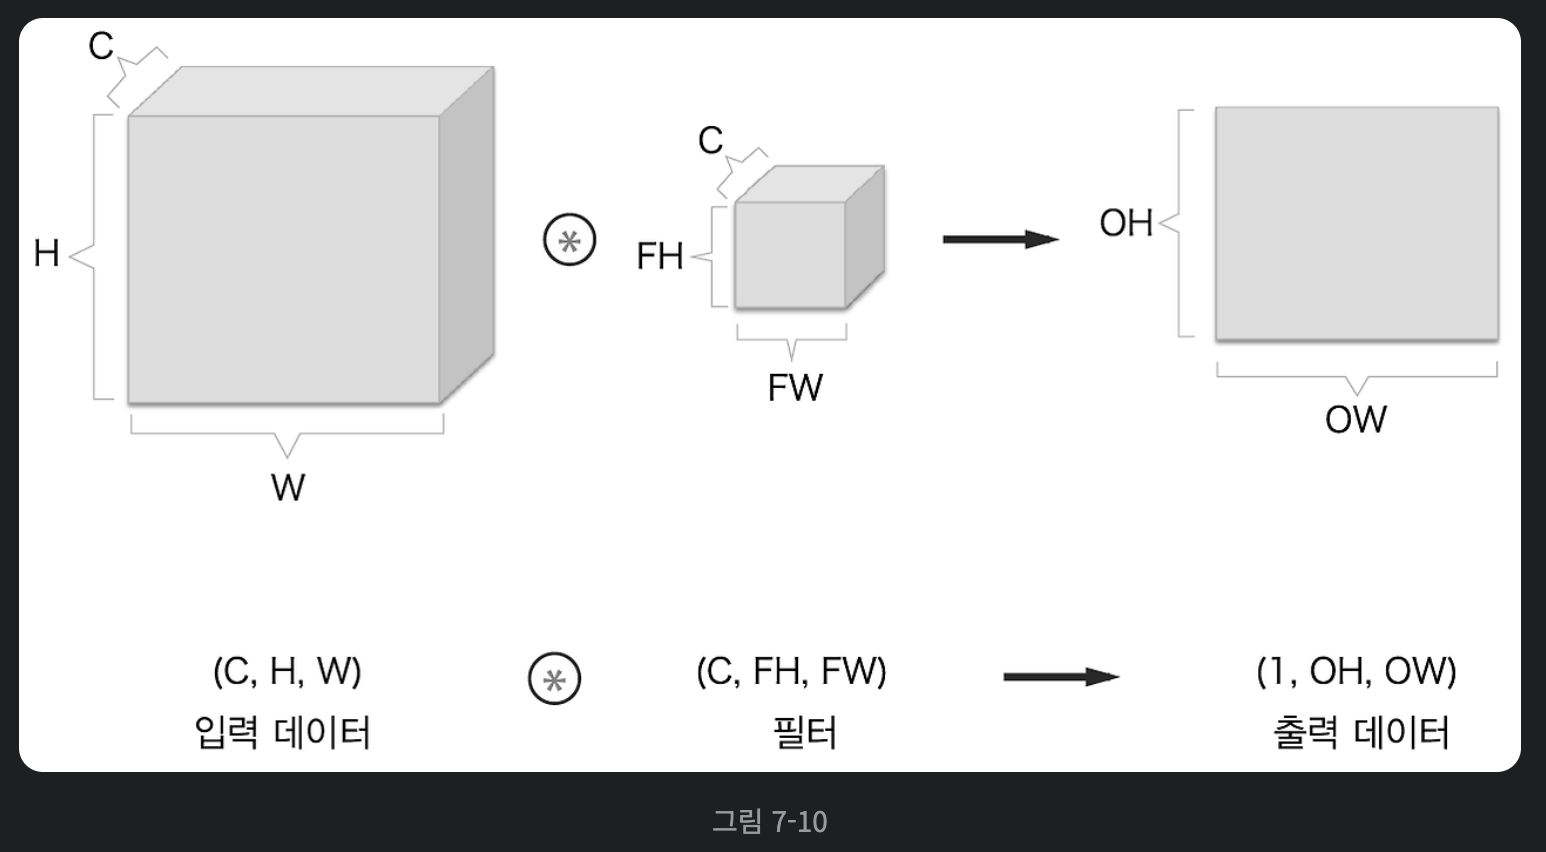

* 위 예시에서는 출력 데이터는 한장의 feature map이 된다. 한 장의 feature map을 다른 말로 하면 채널이 1개인 feature map이 된다.

* 합성곱 연산의 출력으로 다수의 채널을 내보내려면 필터(가중치)를 다수 사용해야 한다.

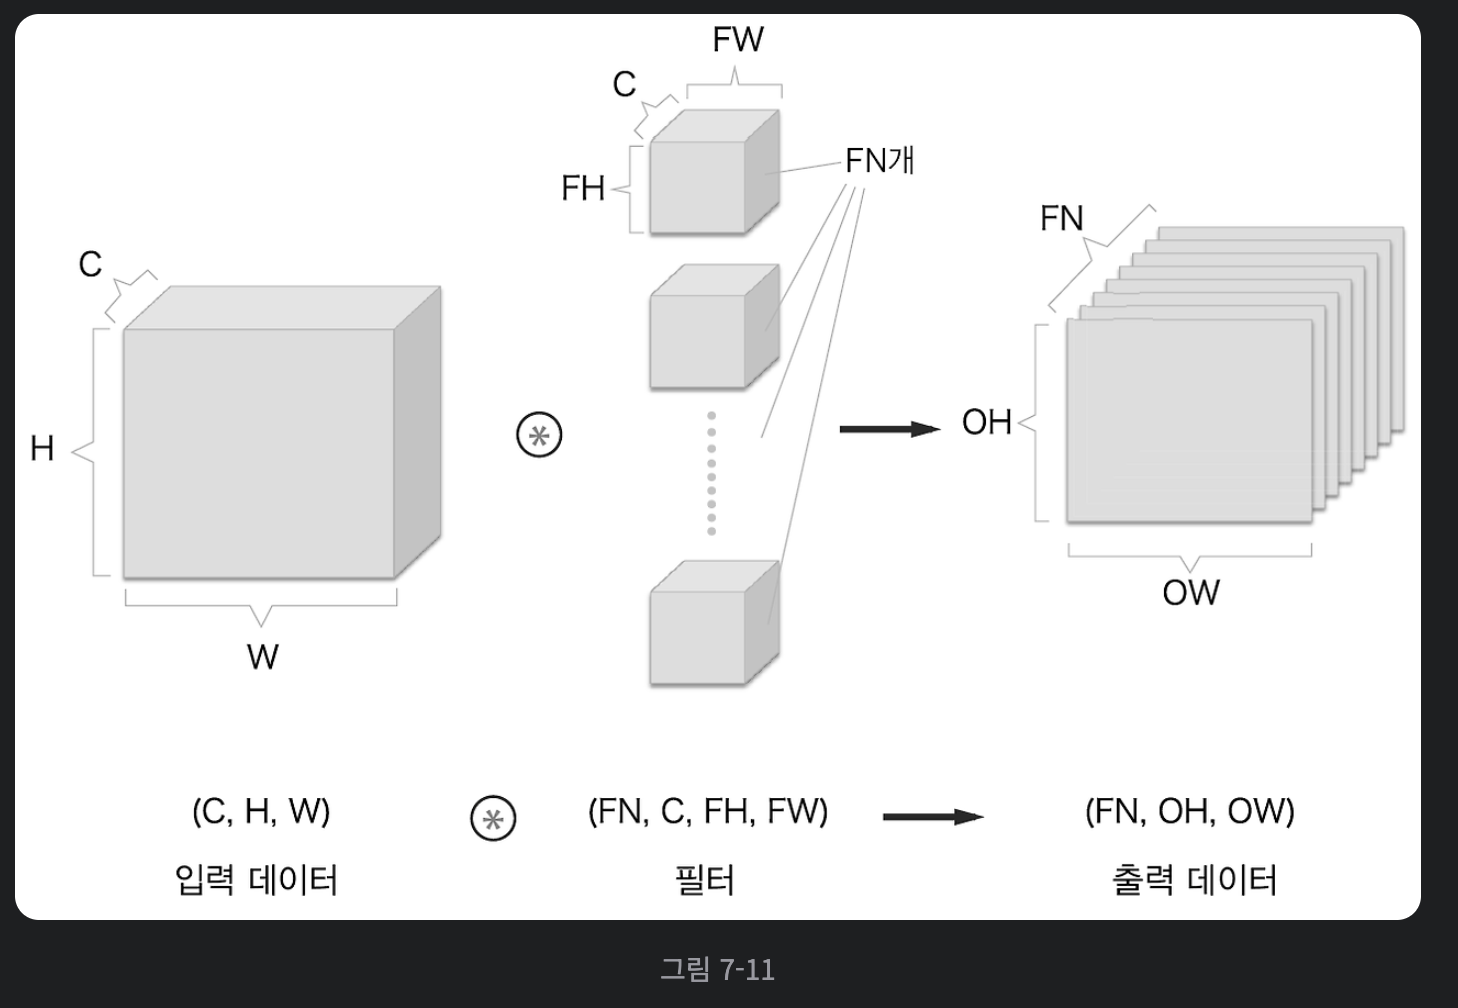

* 그림 7-11과 같이 필터를 FN개 적용하면 출력 맵도 FN개 생성된다. 이 FN개의 맵을 모으면 형상이 (FN, OH, OW)인 블록이 완성된다. 이 완성된 블록을 다음 계층으로 넘기겠다는 것이 CNN의 처리 흐름이다.

* 합성곱 연산에서는 필터의 수도 고려해야 한다. 따라서 필터의 가중치 데이터는 4차원 데이터이며 (출력 채널 수, 입력 채널 수, 높이, 너비) 순으로 쓴다.

* 합성곱 연산에도 편향이 쓰인다.

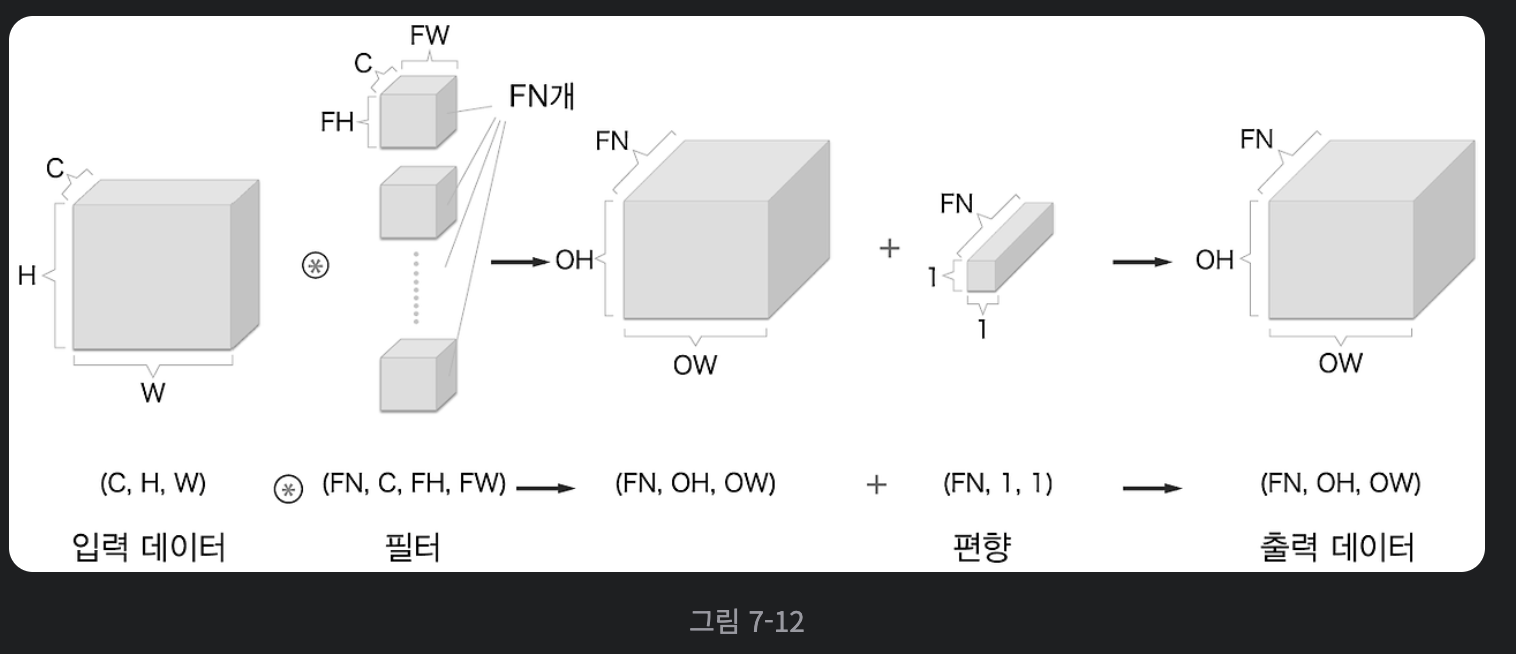

* 형상이 다른 블록의 덧셈은 넘파이의 브로드캐스트 기능으로 쉽게 구현할 수 있다.

배치처리

* 합성곱 연산도 배치 처리를 지원한다.

* 그래서 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터(데이터 수, 채널 수, 높이, 너비)로 저장한다.

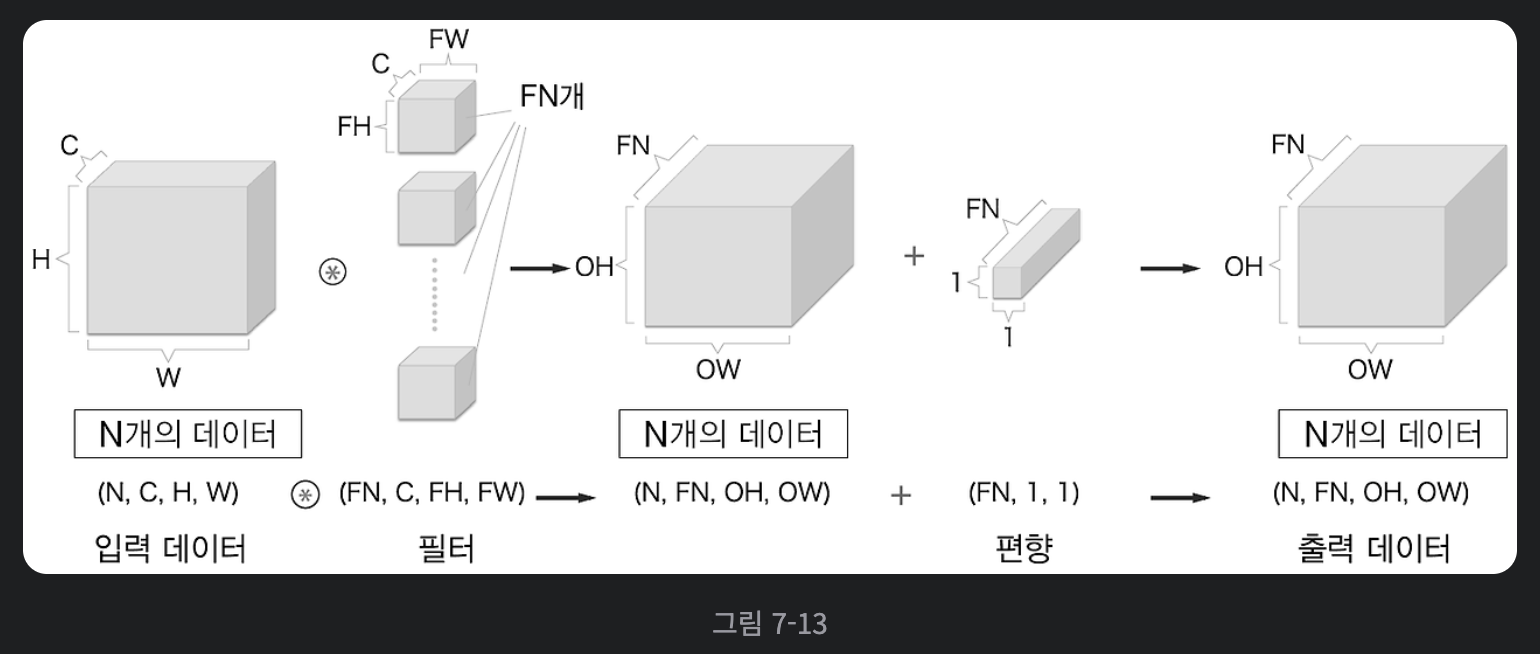

* 그림 7-13을 보면 각 데이터의 선두에 배치용 차원을 추가했다.

* 주의해야 할 점은 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다는 것이다. 즉, N회 분의 처리를 한번에 수행하는 것이다.

# 풀링 계층

* 풀링은 세로, 가로 방향의 공간을 줄이는 연산이다

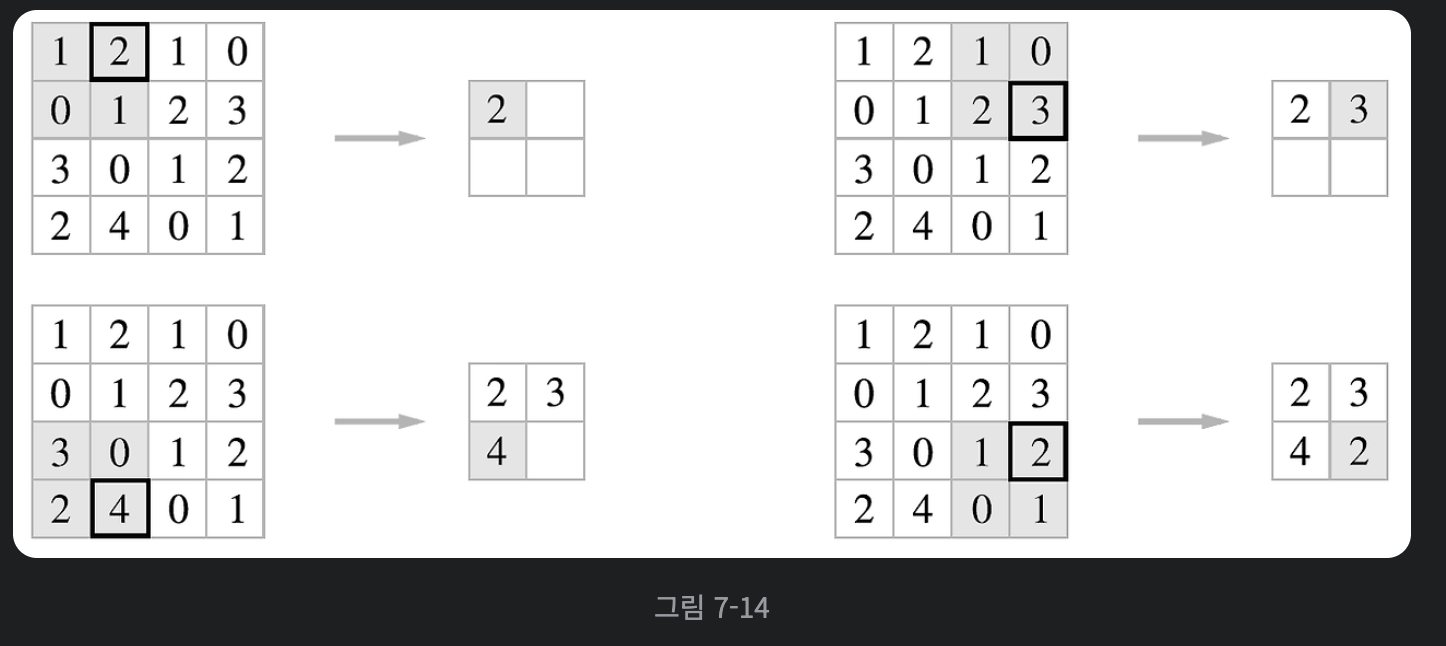

* 위는 2x2 최대 풀링(max pooling)을 스트라이드 2로 처리하는 순서이다. 최대 풀링은 최댓값을 구하는 연산으로 2x2는 대상 영역의 크기를 의미한다.

* 위 예시에서는 스트라이드를 2로 설정했으므로 2x2 윈도우가 원소 2칸 간격으로 이동한다.

* 보통 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정한다.

* 풀링은 최대 풀링 외에도 평균 풀링 등이 있다.
* 이미지 인식 분야에서는 주로 최대 풀링을 사용한다.

풀링 계층의 특징

- 학습 해야 할 매개변수가 없다.
  * 풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이기 때문이다.

- 채널 수가 변하지 않는다.
  * 채널마다 독립적으로 계산하기 떄문이다.

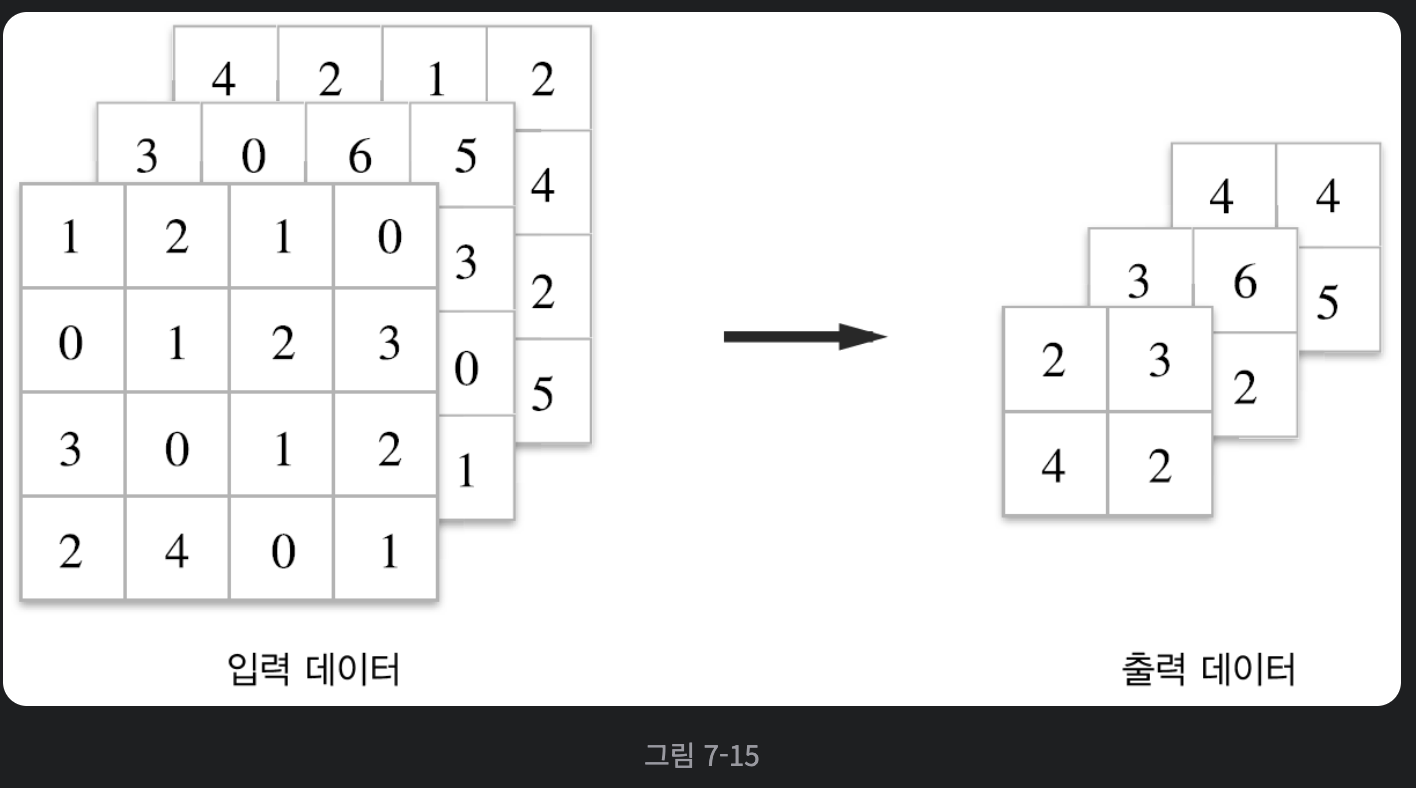

- 입력의 변화에 영향을 적게 받는다.
  * 입력데이터의 차이를 풀링히 흡수해 사라지게 하는 모습을 보여준다.


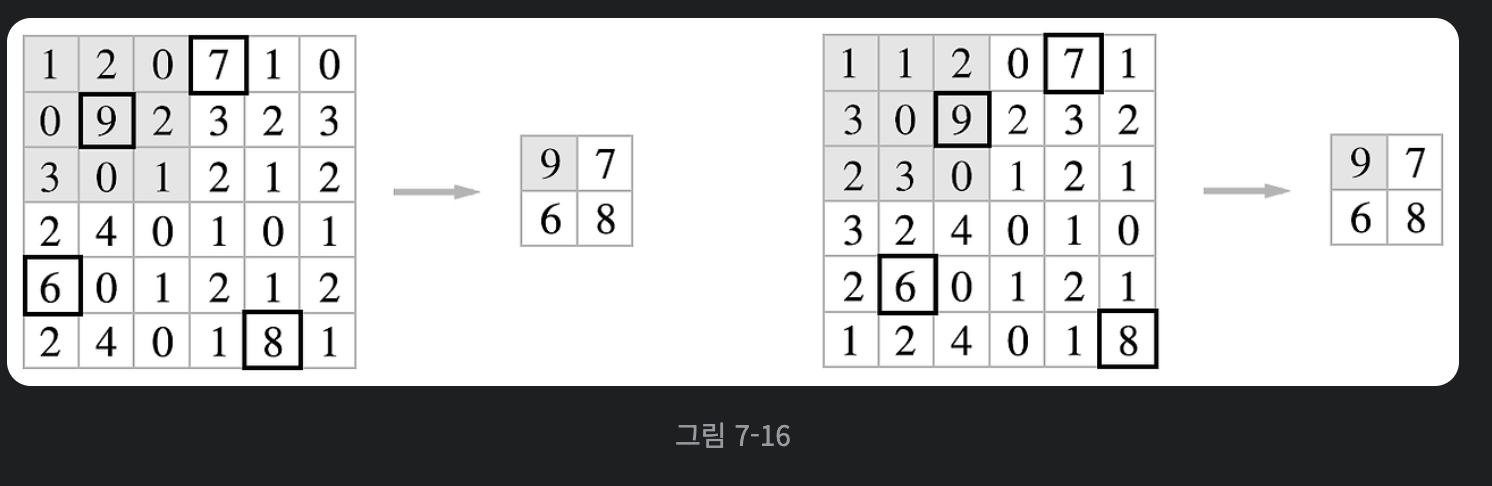

# 합성곱/풀링 계층 구현하기

4차원 배열

* 예를 들어 데이터의 형상이 (10, 1, 28, 28)이라면, 이는 높이 28, 너비 28, 채널 1개인 데이터가 10개라는 이야기다.

In [2]:
import numpy as np

x = np.random.rand(10, 1, 28, 28) # 무작위로 데이터 생성
x.shape

(10, 1, 28, 28)

In [3]:
# 여기에는 (10개 중) 첫 번째 데이터에 접근하려면 단순히 x[0]이라고 쓴다.

x[0].shape
x[1].shape

(1, 28, 28)

In [4]:
# 첫번째 데이터의 첫 채널의 공간 데이터에 접근하려면
x[0, 0] # 또는 x[0][0]

array([[5.26515679e-01, 5.28560857e-01, 6.08752114e-01, 4.35680327e-01,
        3.55504938e-01, 4.54664728e-01, 2.91538753e-01, 2.94204968e-01,
        1.00994928e-01, 5.82284180e-02, 2.66969186e-01, 7.81187777e-01,
        6.41491069e-04, 5.91043072e-01, 6.55301660e-01, 4.03757969e-01,
        7.31315821e-01, 5.64277171e-01, 8.38877663e-01, 5.44420759e-01,
        5.57741508e-01, 9.57756316e-01, 8.00574002e-01, 8.89850587e-02,
        2.95193347e-01, 9.28595252e-01, 2.99580381e-01, 6.30974808e-01],
       [8.85384079e-01, 3.85850660e-01, 1.28080757e-01, 2.99894494e-01,
        6.43339541e-01, 7.55109260e-01, 9.33125852e-01, 1.54717407e-01,
        6.86448412e-01, 8.89018189e-01, 5.32847304e-01, 3.57272996e-03,
        6.15054892e-01, 3.78442484e-01, 6.86914197e-01, 2.35778627e-01,
        8.93458104e-01, 8.41739563e-01, 8.09572585e-01, 5.43311119e-01,
        5.32757964e-01, 9.30596553e-01, 9.26912255e-01, 8.89102393e-02,
        2.42879119e-01, 7.48037535e-01, 3.65229913e-01, 3.60992

im2col로 데이터 전개하기

* for문 대신 in2col이라는 편의 함수를 사용해 간단하게 구현 해 볼 수 있다.

In [1]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

* im2col은 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는 함수이다.
* 그림과 같이 3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바뀐다.
* 정확히는 배치 안의 데이터 수까지 포함한 4차원 데이터를 2차원으로 변환한다.


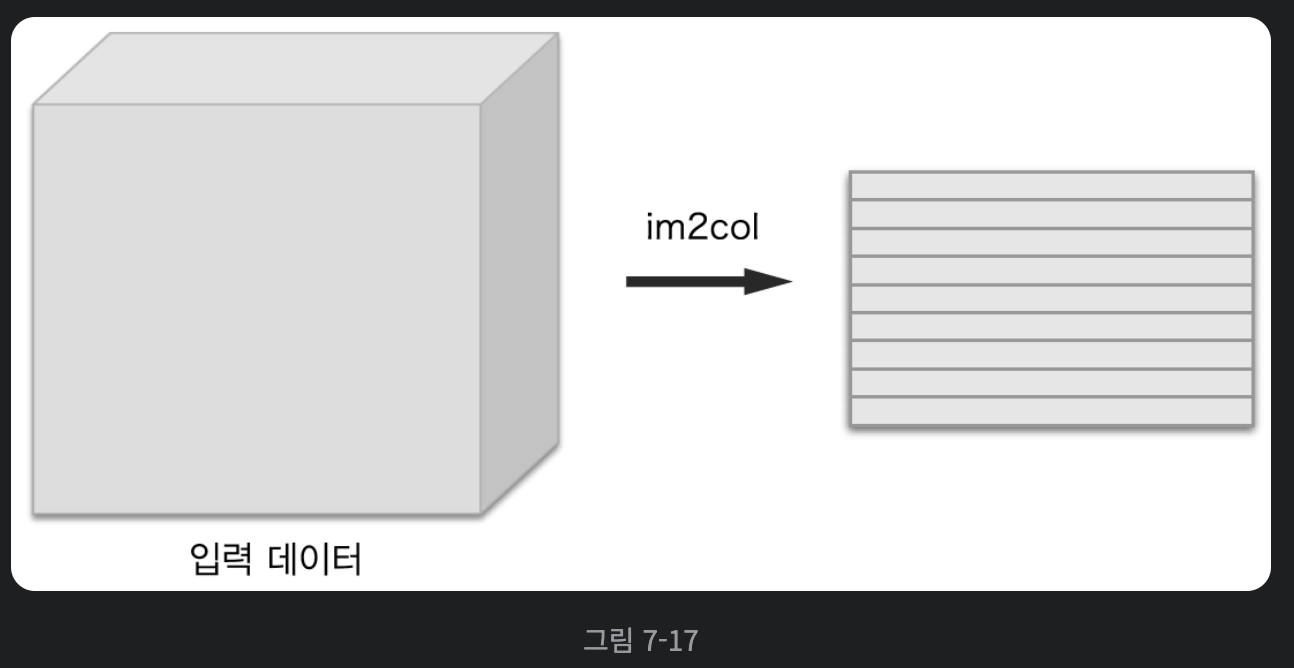

* im2col은 필터링하기 좋게 입력 데이터를 전개한다.
* 구체적으로는 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓는다.
* 이 전개를 필터를 적용하는 모든 영역에서 수행하는 게 im2col 함수이다.

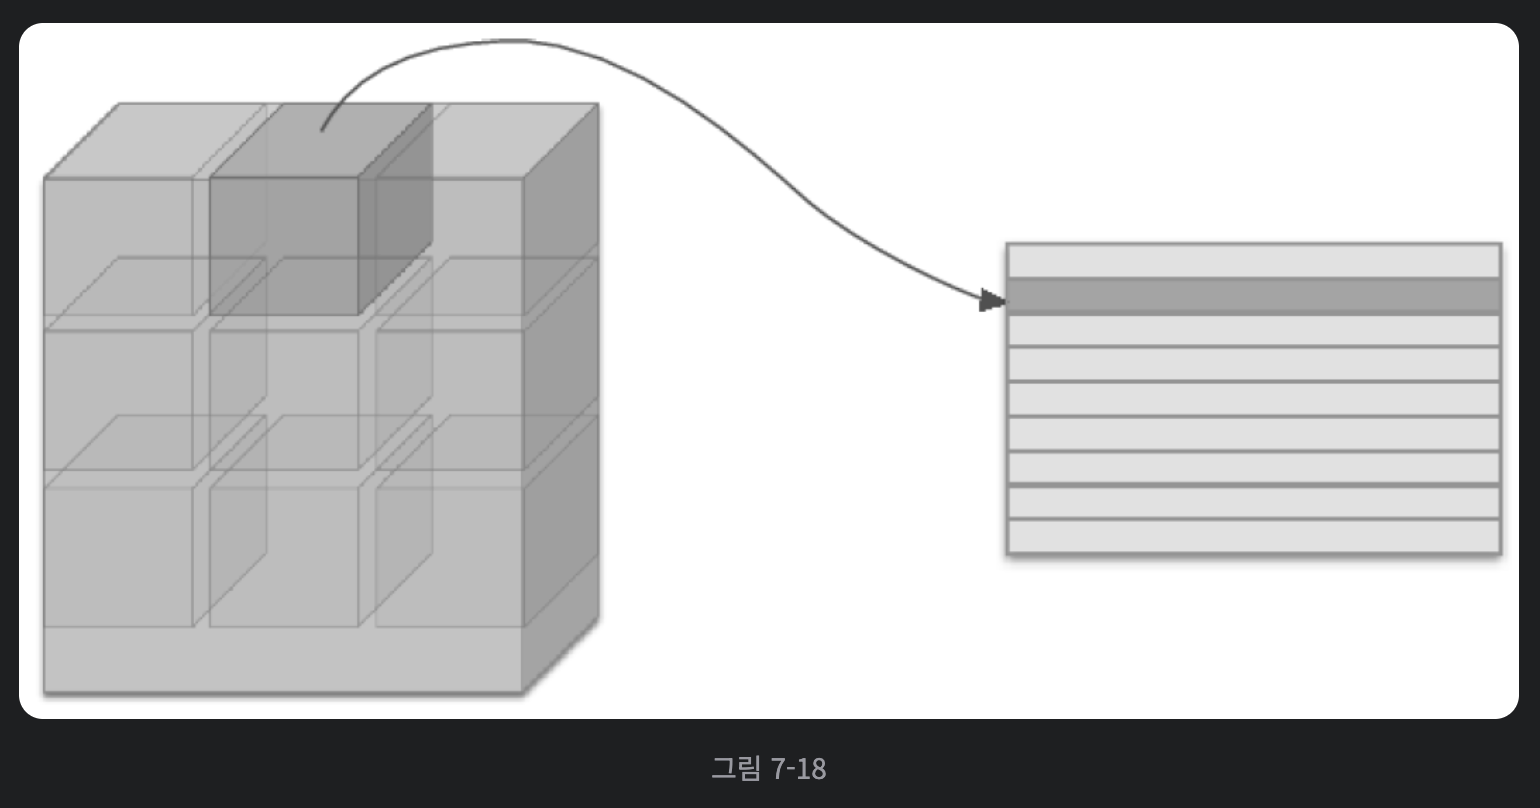

* 그림 7-18에서는 보기에 좋게끔 스트라이트를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분이다.
* 필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록 수보다 많아집니다.
* 그래서 im2col을 사용해 구현하면 메모리를 더 많이 소비하는 단점이 있다.
* 하지만 컴퓨터는 큰 행렬을 묶어서 계산하는 데 탁월하다.
* 예를 들어 행렬 계산 라이브러리 등은 행렬계산에 고도로 최적화되어 큰 행렬의 곱셉을 빠르게 계산할 수 있다.




im2col은 'image to column' 즉 '이미지에서 행렬로'라는 뜻이다.
카페, 체이너 등의 프레임워크는 im2col이라는 이름의 함수를 만들어 합성곱 계층을 구현할떄 이용한다.

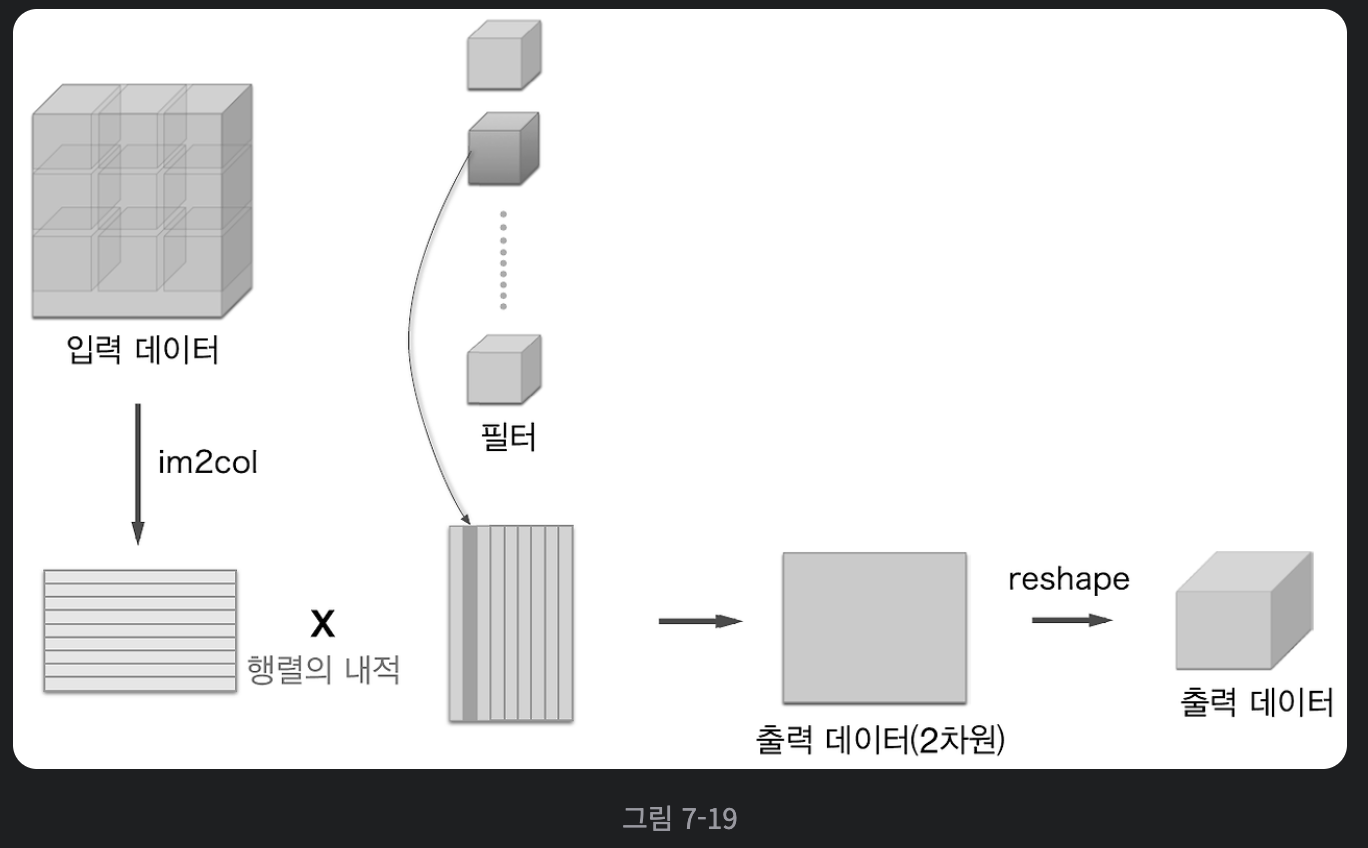

* 그림 7-19와 같이 im2col 방식으로 출력한 결과는 2차원 행렬이다. CNN은 데이터를 4차원 배열로 저장하기 때문에 2차원 출력의 데이터를 4차원으로 reshape 한다.

합성곱 계층 구현하기

In [ ]:
im2col(input_data, filter_h, filter_w, stride=1, pad=0)

* input_data - (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이뤄진 입력 데이터
* filter_h - 필터의 높이
* filter_w - 필터의 너비
* stride - 스트라이드
* pad - 패딩

In [2]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git
import sys
sys.path.append('/content/deep-learning-from-scratch')
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 1118, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 1118 (delta 141), reused 130 (delta 130), pack-reused 943 (from 2)
Receiving objects: 100% (1118/1118), 52.68 MiB | 41.02 MiB/s, done.
Resolving deltas: 100% (644/644), done.


In [3]:
import sys, os
from common.util import im2col

x1 = np.random.rand(1, 3, 5, 7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(3, 75)
(90, 75)


* 여기에서는 두 가지 예를 보여준다.
* 첫번째는 배치 크기가 1, 채널은 3개, 높이 * 너비가 7x7의 데이터이다.
* 두번째는 배치 크기만 10이다.

* im2col함수를 적용한 두 경우 모두 2번째 차원의 원소는 75개이다.
* 이 값은 필터의 원소수와 같다.
* 또한 배치 크기가 1일때는 im2col의 결과의 크기가 (9,75)이고, 10일때는 그 10배인 (90, 75) 크기의 데이터가 저장된다.

In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def foward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

        # 중요
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

* 합성곱 계층은 필터(가중치), 편향, 스트라이드, 패딩을 인수로 받아 초기화한다.
* 필터는 (FN, C, FH, FW)의 4차원 형상이다.
* 여기서 FN은 필터 개수, C는 채널, FH는 필터 높이, FW는 필터 너비이다.

* 중요부분에서는 im2col로 전개하고 필터도 reshape을 사용해 2차원 배열로 전개한다. 이렇게 전개한 두 행렬의 곱을 구한다.

* 필터 전개 부분을 보면 각 필터 블록을 1줄로 펼쳐 세운다.
* 이때 reshape의 두번째 인수를 -1로 지정했는데, 이는 reshape이 제공하는 기능이다. -1을 설정하면 다차원 배열의 원수 수가 변환 후에도 똑같이 되도록 묶어준다.

* 앞의 코드에서 (10,3,5,5) 형상을 한 다차원 배열 W의 원소 수는 총 750개이다.
이 배열에 reshape(10, -1)을 호출하면 750개의 원소를 10묶음으로, 즉 형상이 (10, 75)인 배열로 만들어준다.

* 다음으로 forward 구현의 마지막에서는 출력 데이터를 적절한 형상으로 바꿔준다.
* 이때 transpose 함수를 사용하는데, 이는 다차원 배열의 축 순서를 바꿔주는 함수이다. 인덱스(0부터시작)를 지정하여 축의 순서를 변경한다.

풀링 계층 구현하기

* 풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col을 사용해 입력 데이터를 전개한다.
* 단, 풀링의 경우엔 채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다르다.

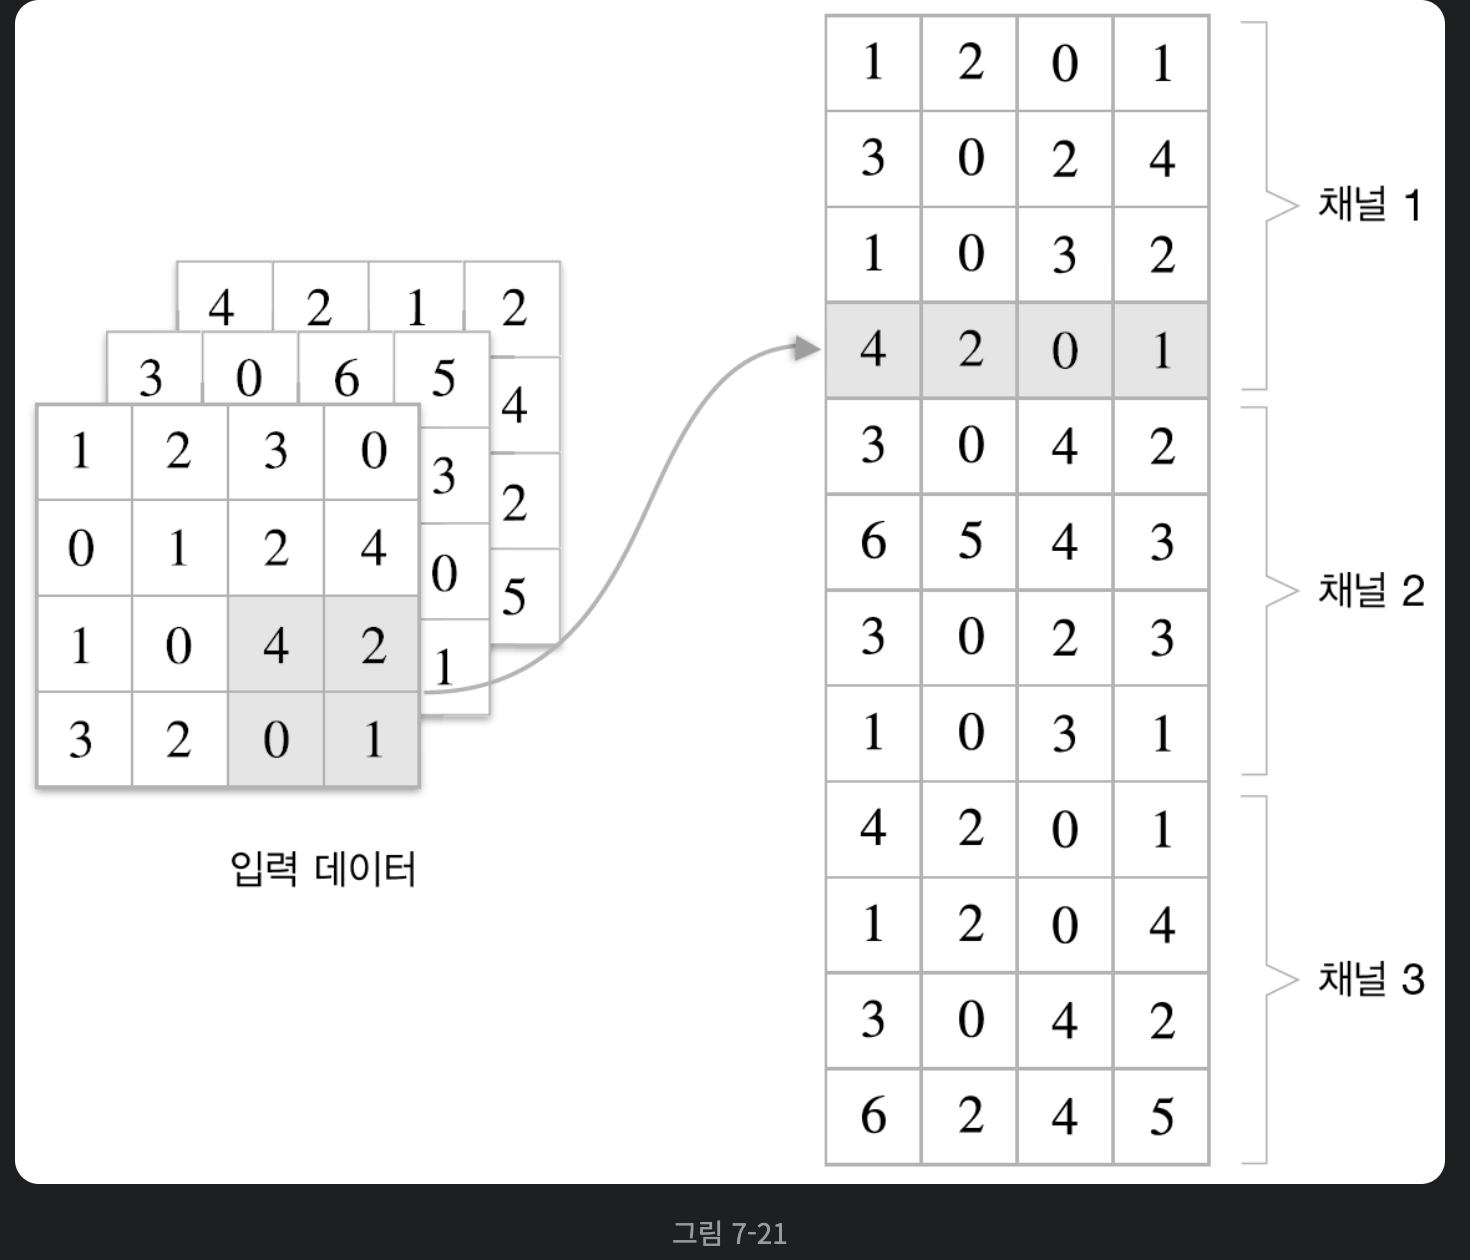

* 입력 데이터에 풀링 적용 영역을 전개하고, 전개한 행렬에서 행 별 최댓값을 구하고 적절한 형상으로 성형하기만 하면 된다.



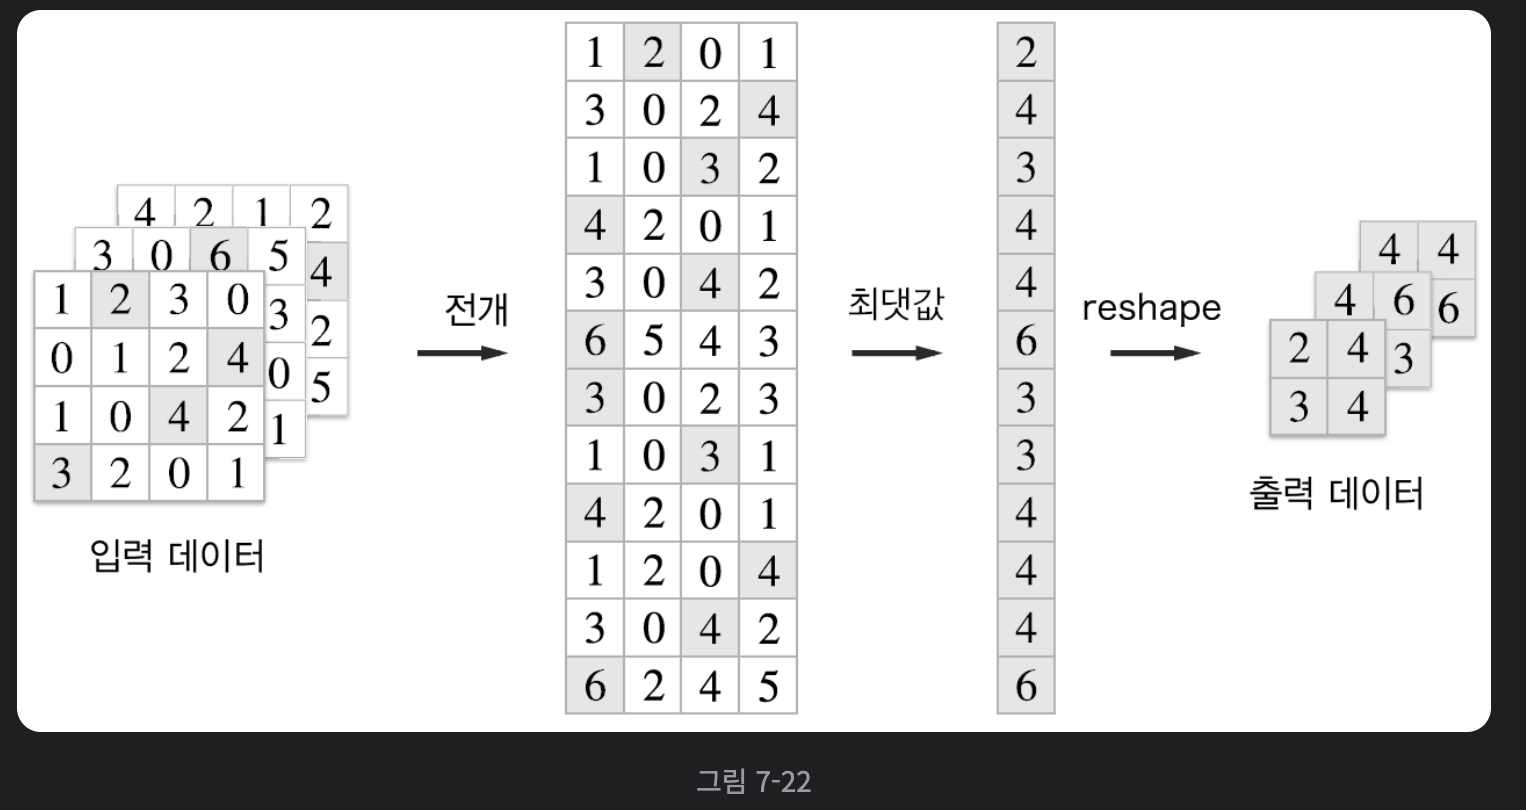

In [5]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        # 최대값 (2)
        out = np.max(col, axis=1)

        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

* 풀링 계층 구현은 3단계로 진행된다.

1. 입력 데이터를 전개한다.
2. 행별 최댓값을 구한다.
3. 적절한 모양으로 성형한다.

# CNN 구현하기

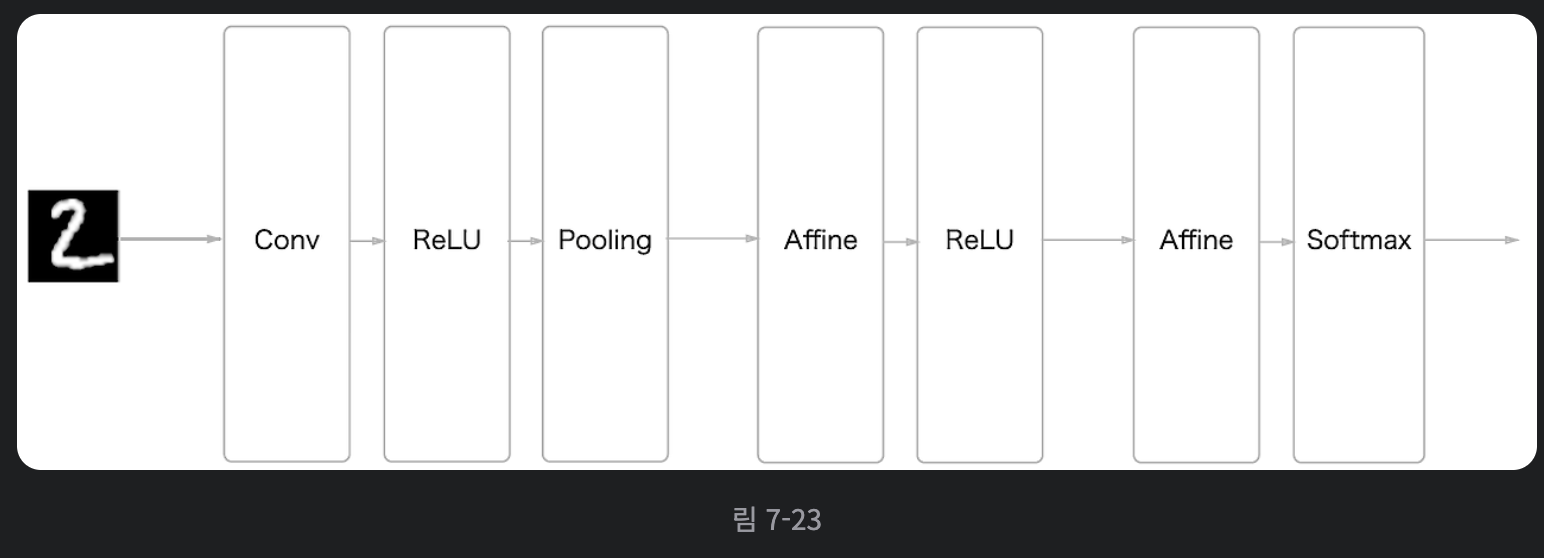

초기화 때 받는 인수
* imput_dim - 입력 데이터(채널 수, 높이, 너비)의 차원
* conv_param - 합성곱 계층의 하이퍼파라미터(딕셔너리), 딕셔너리의 키는 다음과 같다.
  - filter_num : 필터 수
  - filter_size : 필터 크기
  - stride : 스트라이드
  - pad : 패딩
* hidden_size : 은닉층(완전연결)의 뉴런 수
* output_size : 출력층(완전연결)의 뉴런 수
* wight_init_std : 초기화 때의 가중치 표준편차



In [6]:
  class SimpleConvNet:

      def __init__(self, input_dim=(1, 28, 28),
                  conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                  hidden_size=100, output_size=10, weight_init_std=0.01):

          filter_num = conv_param['filter_num']
          filter_size = conv_param['filter_size']
          filter_pad = conv_param['pad']
          filter_stride = conv_param['stride']
          input_size = input_dim[1]
          conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
          pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

* 초기화 인수로 주어진 합성곱 계층의 하이퍼파라미터를 딕셔너리에서 꺼낸다.
* 그리고 합성곱 계층의 출력 크기를 계산한다.
* 이어서 다음 코드느 가중치 매개변수를 초기화하는 부분이다.

In [ ]:
      # 가중치 초기화
          self.params = {}
          self.params['W1'] = weight_init_std * \
                              np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
          self.params['b1'] = np.zeros(filter_num)
          self.params['W2'] = weight_init_std * \
                              np.random.randn(pool_output_size, hidden_size)
          self.params['b2'] = np.zeros(hidden_size)
          self.params['W3'] = weight_init_std * \
                              np.random.randn(hidden_size, output_size)
          self.params['b3'] = np.zeros(output_size)

* 학습에 필요한 매개변수는 1번째 층의 합성곱 계층과 나머지 두 완전연결 계층의 가중치와 편향이다.
* 이 매개변수들은 인스턴스 변수 params 딕셔너리에 저장한다.
* 1번째 층의 합성곱 계층의 가중치를 W1, 편향을 b1이라는 키로 저장한다.
* 2번째 층의 완전연결 계층의 가충치와 편향을 W2와 b2, 마지막 3번째 층의 완전연결 가중치와 편향을 W3와 b3라는 키로 각각 저장한다.

In [ ]:
    # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()


* 순서가 있는 딕셔너리인 layers에 계층들을 차례로 추가한다.
* 마지막 SoftmaxWithLoss 계층만큼은 last_layer라는 별도 변수에 저장한다.
* 이렇게 초기화를 마친 다음에는 추론을 수행하는 매서드와 손실함수값을 구하는 loss매서드를 구현할수 있다.



In [ ]:
def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

* 이 코드에서 인수 x는 입력 데이터, t는 정답 레이블이다.
* 추론을 수행하는 predict 매서드는 초기화 떄 layers에 추가한 계층을 맨 앞에서부터 차례로 forward 매서드를 호출하여 그 결과를 다음 층으로 전달한다.

* 두 결과를 인수로 마지막층의 forward매서드를 호출한다.

In [ ]:
def gradient(self, x, t):
        """기울기(오차역전파법)구함.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


In [ ]:
전체코드

In [10]:
import sys, os
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기(수치미분) 구함.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 dictionary 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기(오차역전파법)구함.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

# 7.6 CNN 시각화하기

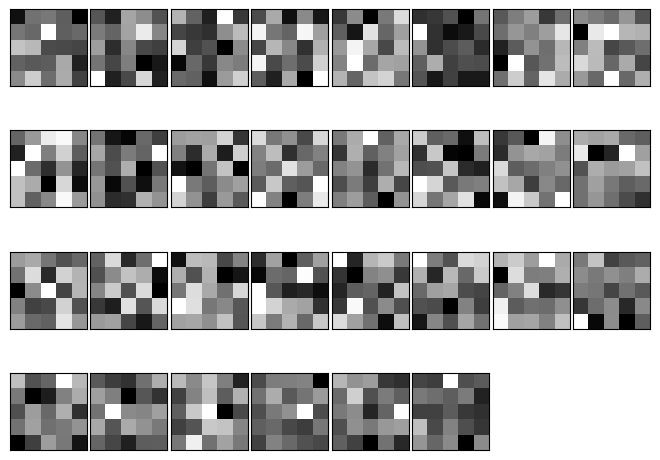

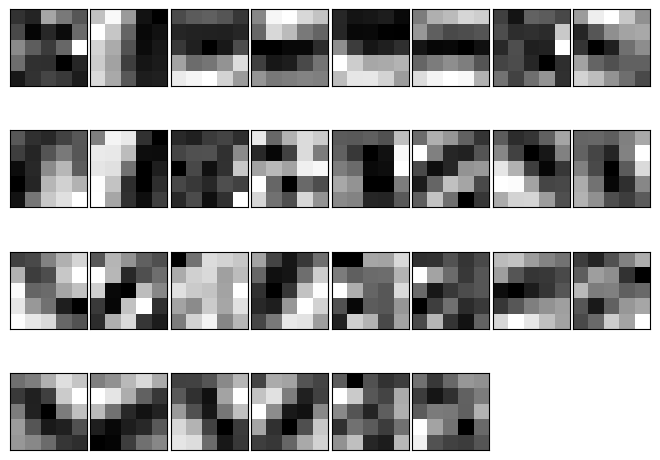

In [15]:
# coding: utf-8
import sys
sys.path.append("./ch07")
import matplotlib.pyplot as plt
from ch07.simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

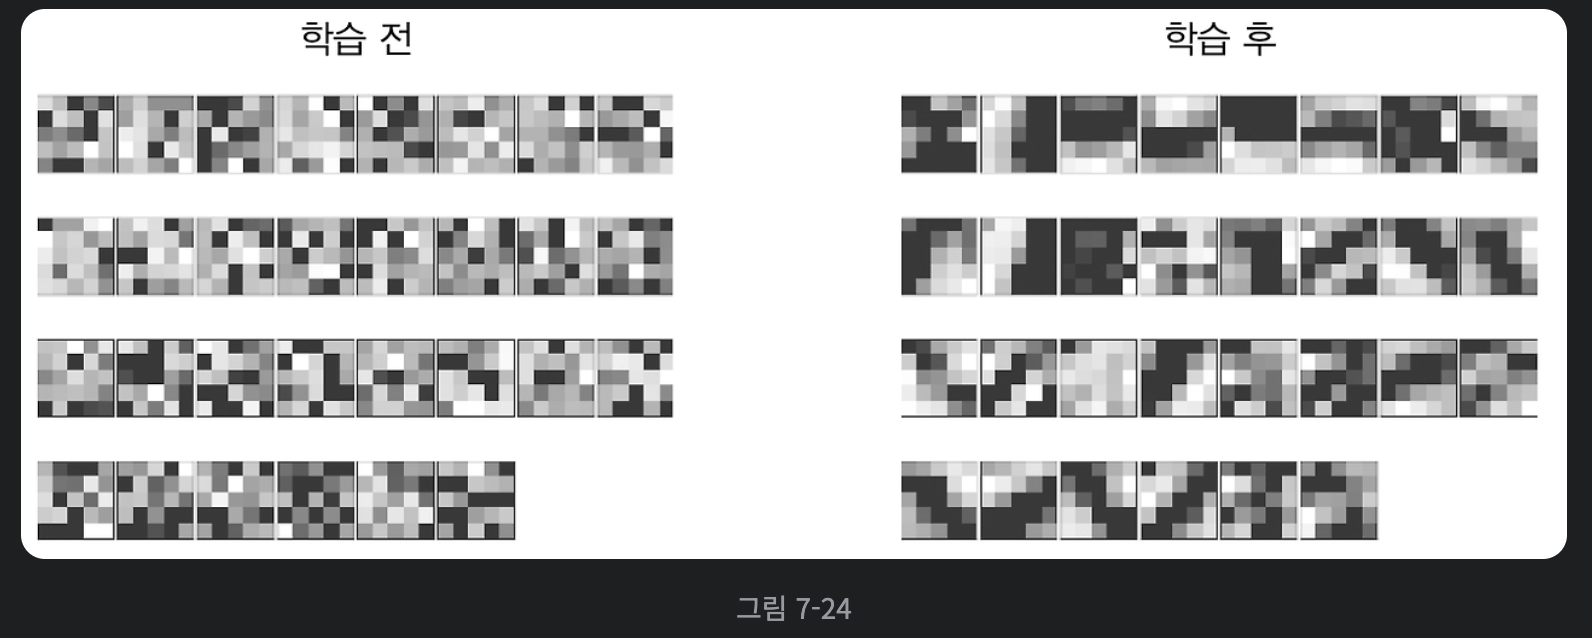

* MNIST 데이터셋으로 간단한 CNN을 학습하면 필터를 시각화 할 수 있다.

* 그림 7-24와 같이 학습 전 필터는 무작위로 초기화 되고 있지만 학습 후 필터는 엣지(색상이 바뀐 경계선)와 블롭(국소적으로 덩어리진 영역)을 보고 있다.

* 이처럼 합성곱 계층의 필터는 엣지나 블롭 등의 원시적인 정보를 추출할 수 있다.

* 겹겹이 쌓인 CNN의 각 계층에서는 계층이 깊어질 수록 추출되는 정보가 더 추상화 된다.

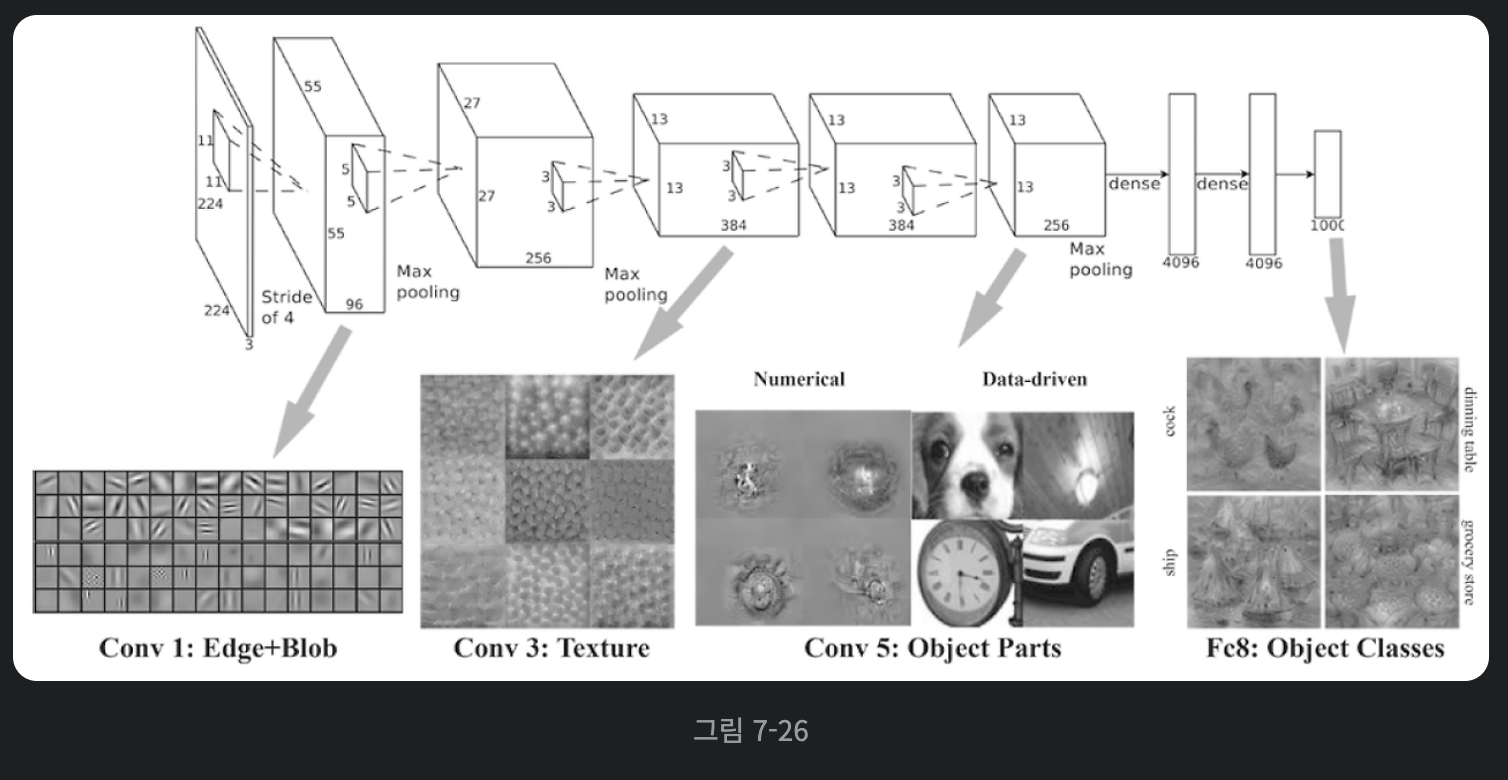

* 처음 층은 단순한 엣지에 반응하고 이어서 텍스쳐에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화한다.

* 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 고급 정보로 변화해 간다.

# 정리

* CNN은 지금까지의 완전 연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.

* 합성곱 계층과 풀링 계층은 im2col을 이용하면 간단하고 효율적으로 구현할 수 있다.

* CNN을 시각화 하면 계층이 깊어질 수록 고급 정보가 추출되는 모습을 확인할 수 있다.